In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
train_filepath=r"C:\Users\Owner\Downloads\breast_cancer_diagnostic\wdbc.data"
names_filepath= r"C:\Users\Owner\Downloads\breast_cancer_diagnostic\wdbc.names"



In [15]:
#EXPLORATORY DATA ANALYSIS

data = pd.read_csv(train_filepath)
#print(data.head())

#after checking the data, i realix=zed that the colmns does not have names so I willname the columns using the code below
#column names can be found on the data source from https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

column_names = ['ID', 'Diagnosis', 'radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1', 'compactness1', 'concavity1', 'concave_points1', 'symmetry1', 'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2', 'smoothness2', 'compactness2', 'concavity2', 'concave_points2', 'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3', 'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3', 'symmetry3', 'fractal_dimension3'] 
data.columns = column_names
print(data.head())



         ID Diagnosis  radius1  texture1  perimeter1   area1  smoothness1  \
0    842517         M    20.57     17.77      132.90  1326.0      0.08474   
1  84300903         M    19.69     21.25      130.00  1203.0      0.10960   
2  84348301         M    11.42     20.38       77.58   386.1      0.14250   
3  84358402         M    20.29     14.34      135.10  1297.0      0.10030   
4    843786         M    12.45     15.70       82.57   477.1      0.12780   

   compactness1  concavity1  concave_points1  ...  radius3  texture3  \
0       0.07864      0.0869          0.07017  ...    24.99     23.41   
1       0.15990      0.1974          0.12790  ...    23.57     25.53   
2       0.28390      0.2414          0.10520  ...    14.91     26.50   
3       0.13280      0.1980          0.10430  ...    22.54     16.67   
4       0.17000      0.1578          0.08089  ...    15.47     23.75   

   perimeter3   area3  smoothness3  compactness3  concavity3  concave_points3  \
0      158.80  1956.0  

In [16]:
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  568 non-null    int64  
 1   Diagnosis           568 non-null    object 
 2   radius1             568 non-null    float64
 3   texture1            568 non-null    float64
 4   perimeter1          568 non-null    float64
 5   area1               568 non-null    float64
 6   smoothness1         568 non-null    float64
 7   compactness1        568 non-null    float64
 8   concavity1          568 non-null    float64
 9   concave_points1     568 non-null    float64
 10  symmetry1           568 non-null    float64
 11  fractal_dimension1  568 non-null    float64
 12  radius2             568 non-null    float64
 13  texture2            568 non-null    float64
 14  perimeter2          568 non-null    float64
 15  area2               568 non-null    float64
 16  smoothne

In [17]:
#we Check for missing values, although it stated that there are no missing values but it is good to always check to be sure 
print(data.isnull().sum())

ID                    0
Diagnosis             0
radius1               0
texture1              0
perimeter1            0
area1                 0
smoothness1           0
compactness1          0
concavity1            0
concave_points1       0
symmetry1             0
fractal_dimension1    0
radius2               0
texture2              0
perimeter2            0
area2                 0
smoothness2           0
compactness2          0
concavity2            0
concave_points2       0
symmetry2             0
fractal_dimension2    0
radius3               0
texture3              0
perimeter3            0
area3                 0
smoothness3           0
compactness3          0
concavity3            0
concave_points3       0
symmetry3             0
fractal_dimension3    0
dtype: int64


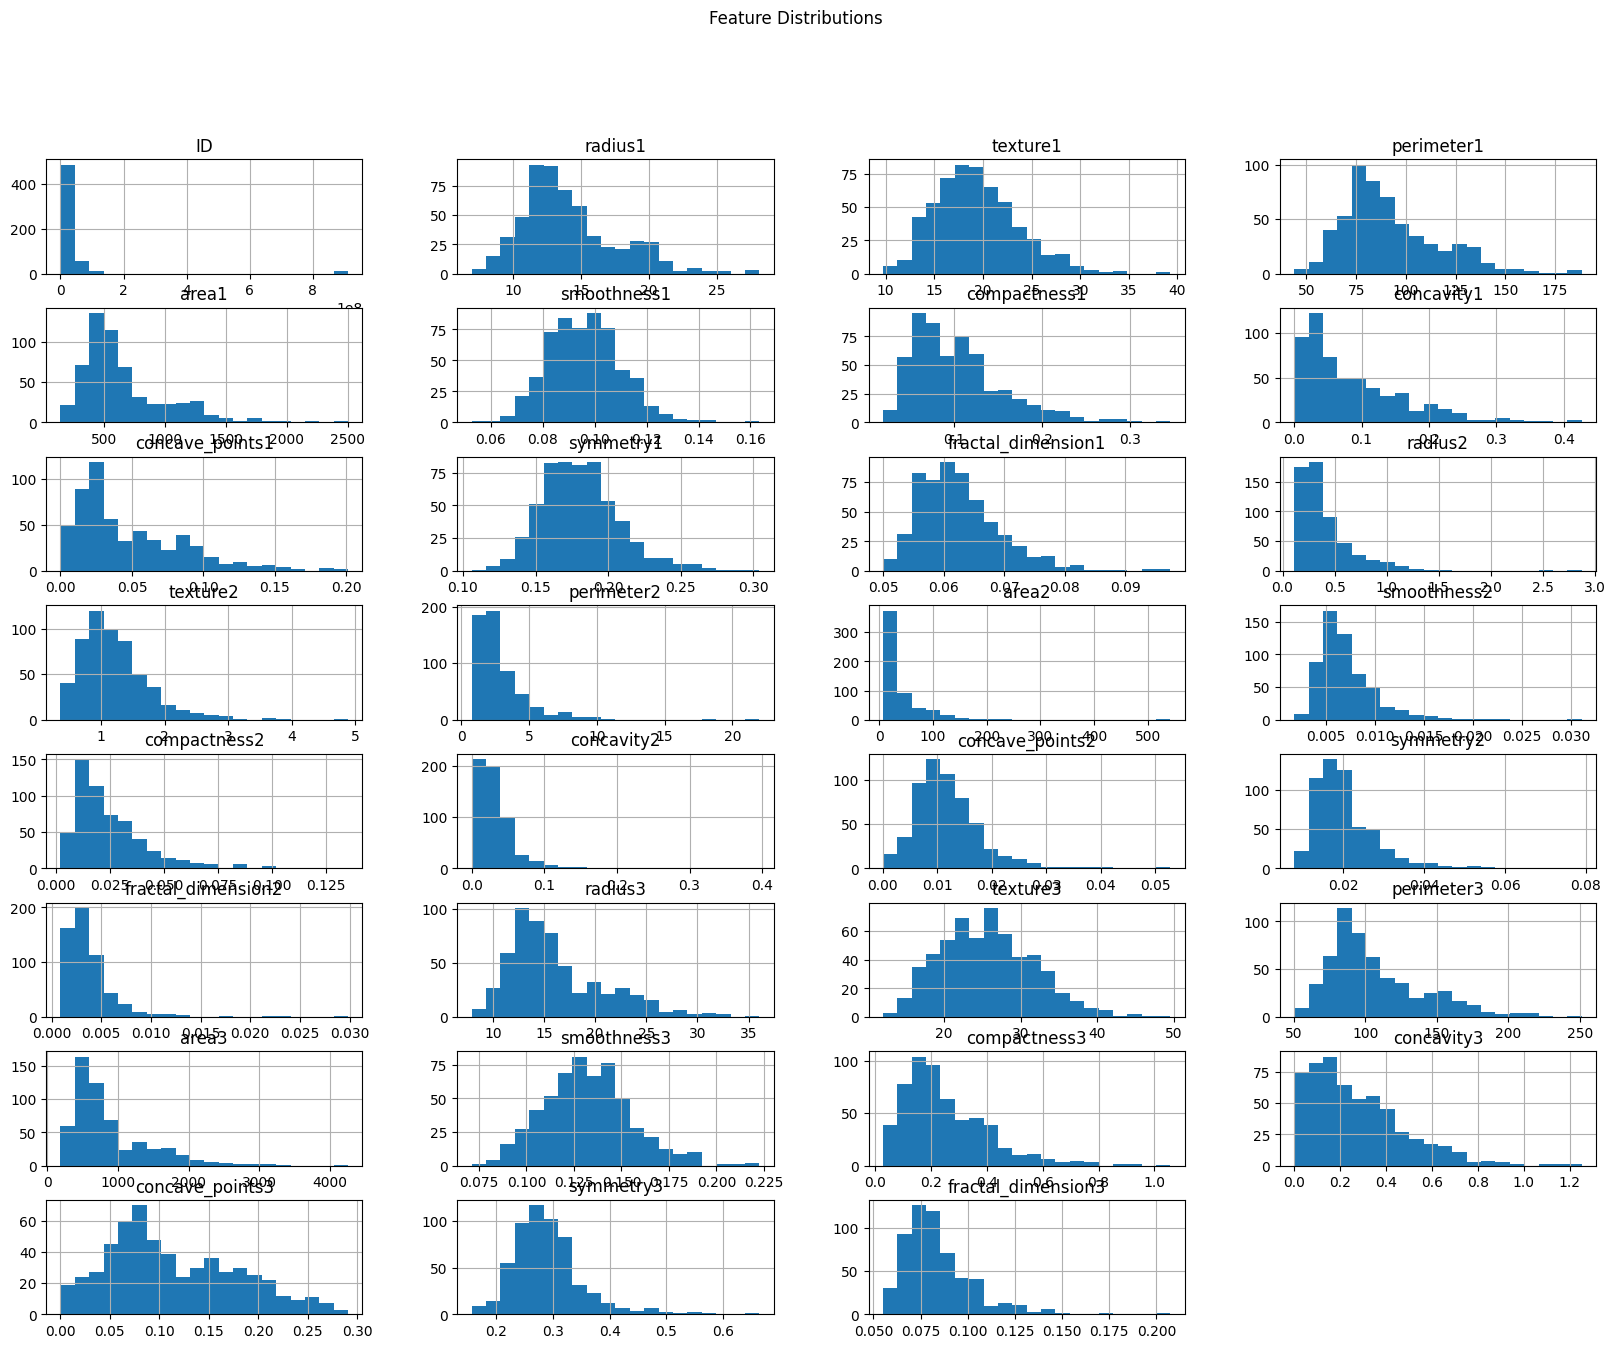

In [18]:
#let us perform some data visualisation 

data.drop('Diagnosis', axis=1).hist(bins=20, figsize=(20, 15), layout=(8, 4))  # Exclude target column
plt.suptitle('Feature Distributions')
plt.show()



In [21]:
le = LabelEncoder()

data['Diagnosis'] = le.fit_transform(data['Diagnosis'])

In [22]:
print(data.head())


         ID  Diagnosis  radius1  texture1  perimeter1   area1  smoothness1  \
0    842517          1    20.57     17.77      132.90  1326.0      0.08474   
1  84300903          1    19.69     21.25      130.00  1203.0      0.10960   
2  84348301          1    11.42     20.38       77.58   386.1      0.14250   
3  84358402          1    20.29     14.34      135.10  1297.0      0.10030   
4    843786          1    12.45     15.70       82.57   477.1      0.12780   

   compactness1  concavity1  concave_points1  ...  radius3  texture3  \
0       0.07864      0.0869          0.07017  ...    24.99     23.41   
1       0.15990      0.1974          0.12790  ...    23.57     25.53   
2       0.28390      0.2414          0.10520  ...    14.91     26.50   
3       0.13280      0.1980          0.10430  ...    22.54     16.67   
4       0.17000      0.1578          0.08089  ...    15.47     23.75   

   perimeter3   area3  smoothness3  compactness3  concavity3  concave_points3  \
0      158.80  19

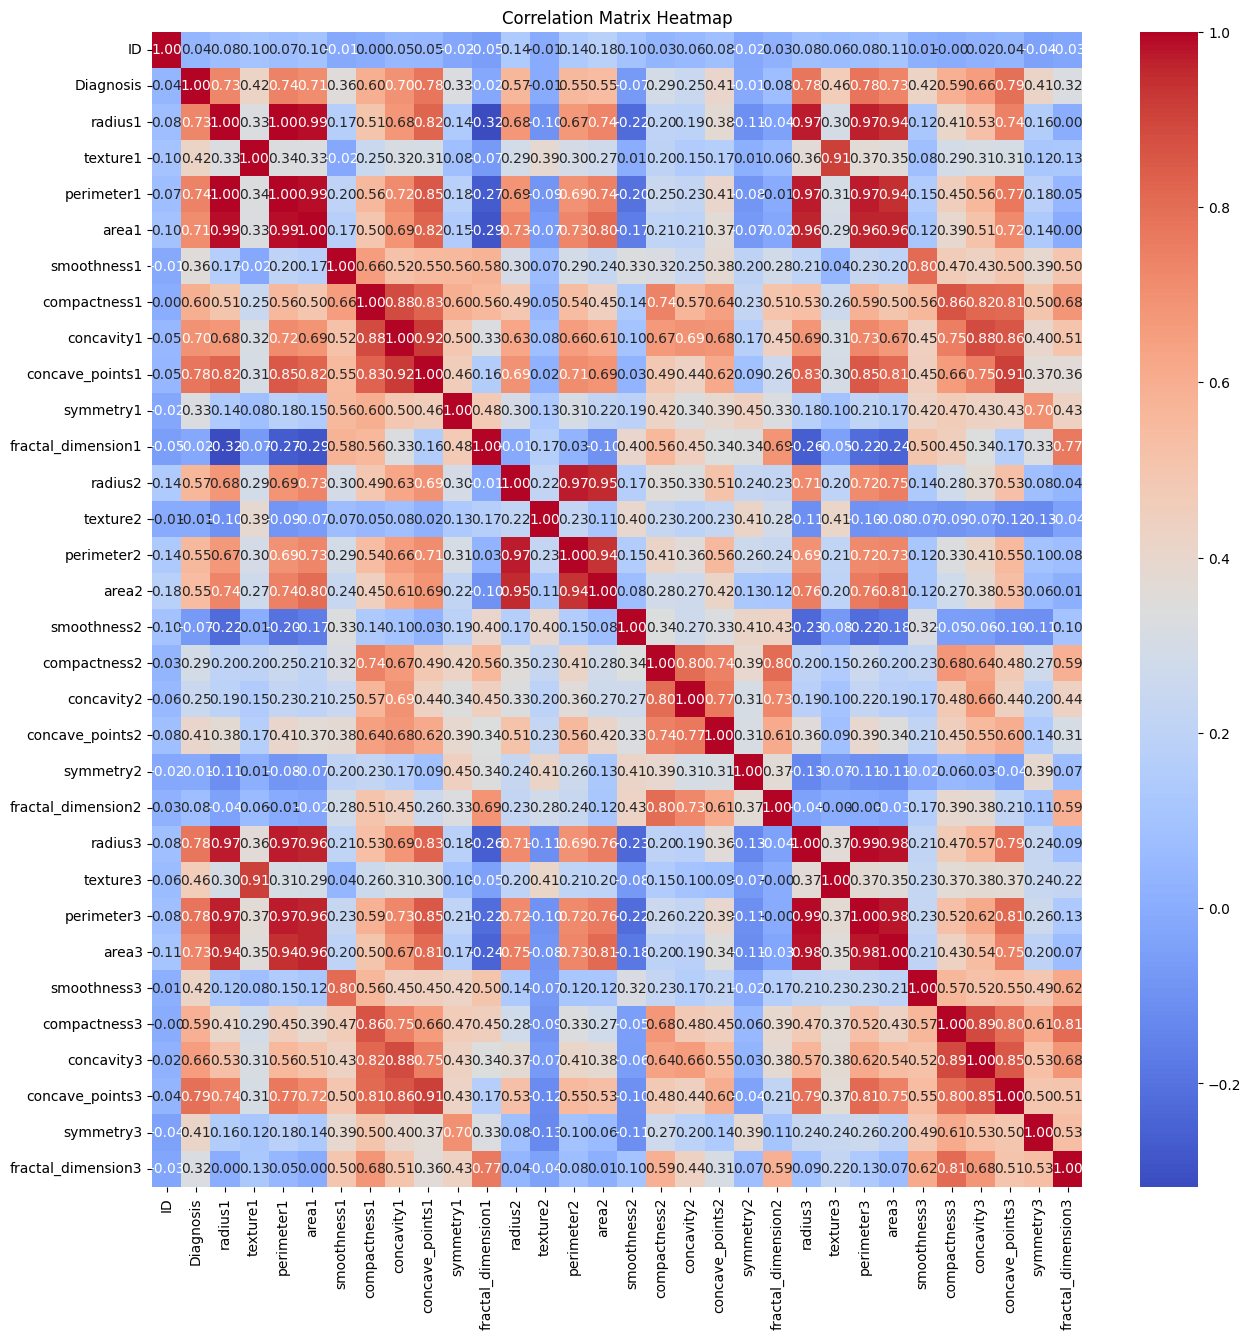

In [23]:
#since w ehave a lot of features, we will use correlation to select features that correlates with the target.
#I do not know much about each feature so using correlation is the best way for me.

correlation_matrix = data.corr()

# Plot heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix Heatmap")
plt.show()

In [24]:
#This code automatically selects the highly corre;ated features based on the threshold set
# Set a threshold for feature selection based on correlation with the target variable
threshold = 0.5  # Adjust as needed

# Assuming 'TargetColumnName' is the name of your target variable in the data
target_corr = correlation_matrix['Diagnosis'].abs()  # Absolute correlation with the target
selected_features = target_corr[target_corr > threshold].index.tolist()

# Remove the target column itself from the selected features if present
selected_features = [feature for feature in selected_features if feature != 'Diagnosis']

print("Selected features based on correlation with the target:", selected_features)

Selected features based on correlation with the target: ['radius1', 'perimeter1', 'area1', 'compactness1', 'concavity1', 'concave_points1', 'radius2', 'perimeter2', 'area2', 'radius3', 'perimeter3', 'area3', 'compactness3', 'concavity3', 'concave_points3']


In [26]:
#normalizing Correlated features
corr_features =  ['radius1', 'perimeter1', 'area1', 'compactness1', 'concavity1', 'concave_points1', 'radius2', 'perimeter2', 'area2', 'radius3', 'perimeter3', 'area3', 'compactness3', 'concavity3', 'concave_points3']
scaler = StandardScaler()
data[corr_features] = scaler.fit_transform(data[corr_features])


In [27]:
print(data[corr_features].head())

    radius1  perimeter1     area1  compactness1  concavity1  concave_points1  \
0  1.832084    1.689106  1.910392     -0.485498   -0.019278         0.555261   
1  1.582106    1.569590  1.560576      1.067960    1.375494         2.051509   
2 -0.767117   -0.590772 -0.762711      3.438483    1.930879         1.463170   
3  1.752545    1.779774  1.827915      0.549886    1.383068         1.439844   
4 -0.474529   -0.385121 -0.503904      1.261043    0.875648         0.833102   

    radius2  perimeter2     area2   radius3  perimeter3     area3  \
0  0.505964    0.269993  0.750223  1.813349    1.545063  1.899054   
1  1.238753    0.861270  1.191180  1.518626    1.356695  1.463694   
2  0.332284    0.293405 -0.285307 -0.278773   -0.246823 -0.547953   
3  1.280813    1.286173  1.200242  1.304847    1.347725  1.227507   
4 -0.251845   -0.318295 -0.286191 -0.162544   -0.111378 -0.241438   

   compactness3  concavity3  concave_points3  
0     -0.428051   -0.143472         1.095262  
1      1.0

In [28]:
# Now that we are done with EDA, let us select our X and Y
X = data[corr_features]
y = data['Diagnosis']
print(X.head())
print(y.head())

    radius1  perimeter1     area1  compactness1  concavity1  concave_points1  \
0  1.832084    1.689106  1.910392     -0.485498   -0.019278         0.555261   
1  1.582106    1.569590  1.560576      1.067960    1.375494         2.051509   
2 -0.767117   -0.590772 -0.762711      3.438483    1.930879         1.463170   
3  1.752545    1.779774  1.827915      0.549886    1.383068         1.439844   
4 -0.474529   -0.385121 -0.503904      1.261043    0.875648         0.833102   

    radius2  perimeter2     area2   radius3  perimeter3     area3  \
0  0.505964    0.269993  0.750223  1.813349    1.545063  1.899054   
1  1.238753    0.861270  1.191180  1.518626    1.356695  1.463694   
2  0.332284    0.293405 -0.285307 -0.278773   -0.246823 -0.547953   
3  1.280813    1.286173  1.200242  1.304847    1.347725  1.227507   
4 -0.251845   -0.318295 -0.286191 -0.162544   -0.111378 -0.241438   

   compactness3  concavity3  concave_points3  
0     -0.428051   -0.143472         1.095262  
1      1.0

In [49]:
#I will satrt with basic modlling "LOgistic Regression", to set the base for the model performance 

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score

In [50]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.3, random_state=42)

In [51]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

LR_accuracy = accuracy_score (y_test, y_pred)
print(f'Accuracy is :{LR_accuracy*100:.2f}%')

Accuracy is :95.32%


In [53]:
#The accuracy score for Logistic Regression is 95%, I am going to try SVM and Random forest whihc are advance Classification Models. 

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

RF_accuracy = accuracy_score(y_test, y_pred)
RF_precision = precision_score(y_test, y_pred)

print(f'Random forest Accuracy: {RF_accuracy*100:.2f}%')
print(f'Random forest Precision: {RF_precision*100:.2f}%')



Random forest Accuracy: 94.15%
Random forest Precision: 92.65%


In [54]:
sv = SVC (kernel='rbf')
sv.fit(X_train, y_train)
y_pred = sv.predict(X_test)

SVM_accuracy = accuracy_score(y_test, y_pred)
SVM_precision = precision_score(y_test, y_pred)

print(f'SVM Accuracy: {SVM_accuracy*100:.2f}%')
print(f'SVM Precision: {SVM_precision*100:.2f}%')



SVM Accuracy: 96.49%
SVM Precision: 98.44%


Observation: 
The SVM model performed the best in terms of both accuracy (96.49%) and precision (98.44%), making it the optimal choice for this dataset. Logistic Regression and Random Forest models also achieved strong performance, with accuracy and precision scores that were only slightly lower than those of SVM. Notably, this model performance aligns well with the expected range provided on the original data source website, validating our modeling approach and feature preprocessing steps

Conclusion: Given the high dimensionality of this dataset, I initially used correlation analysis to select features for modeling. While this approach worked well, it’s possible that using Recursive Feature Elimination (RFE) or other model-based feature selection methods could yield even better results by selecting features that maximize model performance. In future work, hyperparameter tuning could also further improve the performance, especially for SVM, as it showed the best results here. Overall, the findings indicate that SVM is a strong model choice for this dataset, but alternative feature selection methods may provide additional insights and optimize the model further.
